## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
mice = combined_study_data.nunique()
print("Number of mice: " + str(mice['Mouse ID']))

Number of mice: 249


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [31]:
# Optional: Get all the data for the duplicate mouse ID.

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_study = combined_study_data.drop_duplicates(subset=['Mouse ID'])

In [16]:
# Checking the number of mice in the clean DataFrame.
print(df_study.count())

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64


## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen = combined_study_data.groupby(['Drug Regimen'])

mean_val = round(regimen['Tumor Volume (mm3)'].mean(), 3)
median_val = round(regimen['Tumor Volume (mm3)'].median(), 3)
variance_val = round(regimen['Tumor Volume (mm3)'].var(), 3)
dev_val = round(regimen['Tumor Volume (mm3)'].std(), 3)
sem_val = round(regimen['Tumor Volume (mm3)'].sem(), 3)

sum_vol = pd.DataFrame({'Mean': mean_val, 'Median': median_val, 'Variance': variance_val, 'Standard Deviation': dev_val, 'SEM': sem_val})
sum_vol

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

combined_study_data.groupby('Drug Regimen').agg(Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'), Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'), Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'), SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem'))

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

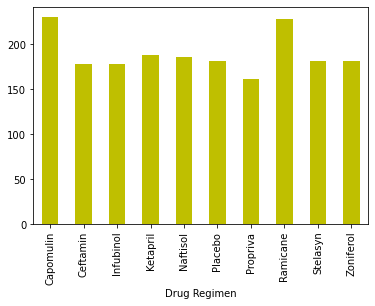

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
reg_men = regimen.Timepoint.count()
reg_men.plot.bar(x='Drug Regimen', y='Count', color='y')



([<matplotlib.axis.XTick at 0x1f38e81d550>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

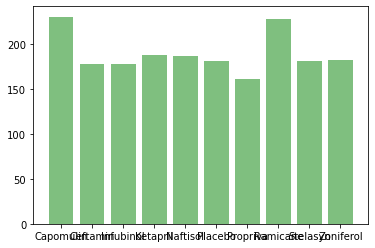

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_axis = reg_men.to_list()
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

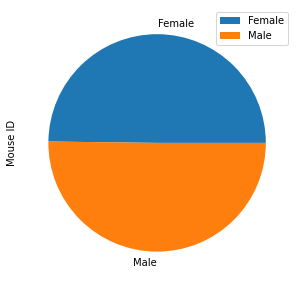

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_ders = df_study.groupby(['Sex'])
genn = gen_ders.count()
genn.plot.pie(y='Mouse ID', figsize=(5,5))


([<matplotlib.patches.Wedge at 0x1f38ea00668>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

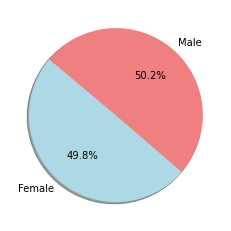

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gen = gen_ders.Timepoint.count()
gennn = gen.to_list()
labels = ["Female", "Male"]
colors = ["lightblue", "lightcoral"]
explode = (0,0)
plt.pie(gennn, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousee = combined_study_data.drop_duplicates(subset="Mouse ID", keep='last')

#df = mousee.loc['Mouse ID', 'Tumor Volume (mm3)']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



In [73]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = mousee['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = mousee['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1 = mousee['Tumor Volume (mm3)'].quantile(.25)
q3 = mousee['Tumor Volume (mm3)'].quantile(.75)
iqr = q3-q1
print("IQR:" + str(iqr))

#tumors = mousee['Tumor Volume (mm3)'].to_list
#outliers = []

#for tumor in mousee:
#    if tumor< q1-iqr or tumor> q3+iqr:
#        outliers.append(tumor)
        
#print(outliers.count())

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IQR:19.022849680000007


In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

301    b128
Name: Mouse ID, dtype: object


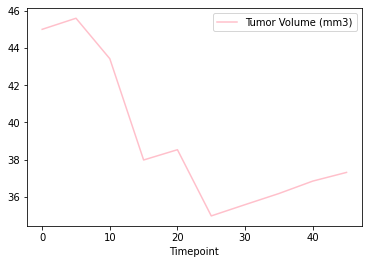

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_study_data[combined_study_data["Drug Regimen"]=="Capomulin"]
sample = capomulin.sample()
sam = sample['Mouse ID']
print(sam)

random_mouse = capomulin[capomulin['Mouse ID'] == 'i738']
random_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='pink')


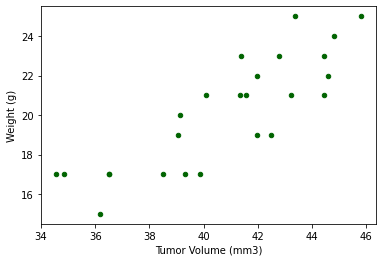

In [13]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
cap_mice = pd.merge(cap_vol, cap_weight, on="Mouse ID")
cap_mice.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)', c='DarkGreen')

## Correlation and Regression

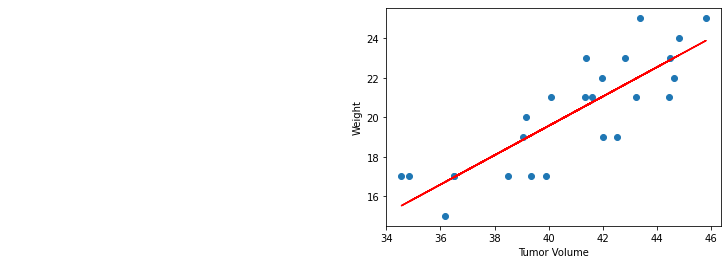

Linear regression model:y = 0.74x + -10.15
Correlation coefficient:0.84


In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mice['Tumor Volume (mm3)']
y_values = cap_mice['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()
print("Linear regression model:" + line_eq)

corr = round(st.pearsonr(x_values,y_values)[0],2)
print("Correlation coefficient:" + str(corr))